In [56]:
import tensorflow as tf
print(tf.__version__)

2.0.0


# Sequence modelling 
 
 The data that is worked with sequences is less structured, such as text, sound, etc.
 The problem when we work with it is that not all of them are the same length or size, so when it comes to forming batches it can cause problems. Let's see how to work with these problems.
 

In [12]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

#we can have sequences of different lengths
sequences=[
    [4,12,44,32],
    [1,5,34,76,2,34],
    [87,27,56,32,10]
]

#pad_sequences allows you to make all sequences the same size

#makes padding at the beginning of sequences
padding_sequences=pad_sequences(sequences,padding='pre')
print(pading_sequences)
print()

#pads at the end of sequences
padding_sequences=pad_sequences(sequences,padding='post')
print(pading_sequences)
print()

#does pading and defines the maximum size if there are longer sequences truncates them
#truncating controls whether it truncates at the start or end
#value indicates the value with which the padding is done
pading_sequences=pad_sequences(sequences,padding='post',maxlen=5,truncating='post',value=1000)
print(pading_sequences)
print()

#infer the shape of the sequence
sequences=[
    [[2,1],[3,3]],
    [[4,4],[5,5],[6,6]]
]

padding_sequences=pad_sequences(sequences,padding='post')
print(pading_sequences)


[[ 0  0  4 12 44 32]
 [ 1  5 34 76  2 34]
 [ 0 87 27 56 32 10]]

[[ 4 12 44 32  0  0]
 [ 1  5 34 76  2 34]
 [87 27 56 32 10  0]]

[[   4   12   44   32 1000]
 [   1    5   34   76    2]
 [  87   27   56   32   10]]

[[[2 1]
  [3 3]
  [0 0]]

 [[4 4]
  [5 5]
  [6 6]]]


In [17]:
#now when we process the batches of these sequences we want what was added in the padding to be ignored
#one way to do this is to use the Masking layer

sequences=[
    [4,12,44,32],
    [1,5,34,76,2,34],
    [87,27,56,32,10]
]

padding_sequences=pad_sequences(sequences,padding='pre')
print(pading_sequences)
print()

#import the layer
from tensorflow.keras.layers import Masking
import numpy as np
#instantiate the layer indicating the value used in the padding with the mask_value parameter
masking_layer=Masking(mask_value=0)

#this layer expects data of the form (batch,sequence,features) but our data only has (batch,sequences)
#to test let's add a dimension dumie at the end
pading_sequences=pading_sequences[...,np.newaxis]
print(pading_sequences)
print()

#let's pass these sequences to the layer
masking_sequence=masking_layer(pading_sequences)

#we see that it seems very similar that he did nothing to it
print(masking_sequence)
print()

#but if we see ._keras_mask we will see an array that indicates with false the elements that are padding
#(they do not belong to the original sequence) and true for those that do belong to the original sequence
print(sequence_masking._keras_mask)

#this matrix can be used to ensure that the loss function is calculated correctly, ignoring what is not
#belongs to the original data for calculation


[[ 0  0  4 12 44 32]
 [ 1  5 34 76  2 34]
 [ 0 87 27 56 32 10]]

[[[ 0]
  [ 0]
  [ 4]
  [12]
  [44]
  [32]]

 [[ 1]
  [ 5]
  [34]
  [76]
  [ 2]
  [34]]

 [[ 0]
  [87]
  [27]
  [56]
  [32]
  [10]]]

tf.Tensor(
[[[ 0]
  [ 0]
  [ 4]
  [12]
  [44]
  [32]]

 [[ 1]
  [ 5]
  [34]
  [76]
  [ 2]
  [34]]

 [[ 0]
  [87]
  [27]
  [56]
  [32]
  [10]]], shape=(3, 6, 1), dtype=int32)

tf.Tensor(
[[False False  True  True  True  True]
 [ True  True  True  True  True  True]
 [False  True  True  True  True  True]], shape=(3, 6), dtype=bool)


***
<a id="coding_tutorial_1"></a>
## The IMDb Dataset

#### Load the IMDB review sentiment dataset

In [20]:
# Import imdb
from tensorflow.keras.datasets import imdb

In [21]:
# Download and assign the data set using load_data()
#Contains opinions about movies and a rating 
(x_train,y_train),(x_test,y_test)=imdb.load_data()

17465344/17464789 [==============================] - 0s 0us/step


#### Inspect the dataset

In [22]:
# Inspect the type of the data
type(x_train)

numpy.ndarray

In [23]:
# Inspect the shape of the data
print(x_train.shape)
print(y_train.shape)

(25000,)
(25000,)


In [24]:
# Display the first dataset element input
# Notice encoding
x_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 22665,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 21631,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 19193,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 10311,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 31050,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 12118,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5

In [25]:
# Display the first dataset element output
y_train[0]

1

#### Load dataset with different options

In [ ]:
# Load the dataset with defaults
imdb.load_data(path='~/.keras/dataset/imdb.npz',index_form=3)

# ~/.keras/dataset/

In [ ]:
# Limit the vocabulary to the top 500 words using num_words

imdb.load_data(num_words=500)

In [ ]:
# Ignore the top 10 most frequent words using skip_top
#remove the 10 most frequent words and replace them with a 2
imdb.load_data(skip_top=10,oov_char=2)

In [ ]:
# Limit the sequence lengths to 500 using maxlen
imdb.load_data(max_len=500)

In [ ]:
# Use '1' as the character that indicates the start of a sequence
imdb.load_data(start_char=500)

#### Explore the dataset word index

In [36]:
# Load the imdb word index using get_word_index()
imdb_word_index=imdb.get_word_index()

In [37]:
# View the word index as a dictionary,
# accounting for index_from.
index_from=3
imdb_word_index={key:value+index_from for key,value in imdb_word_index.items() }

In [38]:
# Retrieve a specific word's index
imdb_word_index['simpsonian']

52256

In [39]:
imdb_word_index['the']
#Note that it is one of the most frequent because when coding it is coded with raking+indexform index_form=3 so ranking=1
#index_form es ina especie de llave para codificar

4

In [40]:
imdb_word_index['a']

6

In [44]:
# View an input sentence
inv_imdb_word_index={value:key for key,value in imdb_word_index.items() }

In [45]:
[inv_imdb_word_index[index] for index in x_train[0] if index > 3]

['this',
 'film',
 'was',
 'just',
 'brilliant',
 'casting',
 'location',
 'scenery',
 'story',
 'direction',
 "everyone's",
 'really',
 'suited',
 'the',
 'part',
 'they',
 'played',
 'and',
 'you',
 'could',
 'just',
 'imagine',
 'being',
 'there',
 'robert',
 "redford's",
 'is',
 'an',
 'amazing',
 'actor',
 'and',
 'now',
 'the',
 'same',
 'being',
 'director',
 "norman's",
 'father',
 'came',
 'from',
 'the',
 'same',
 'scottish',
 'island',
 'as',
 'myself',
 'so',
 'i',
 'loved',
 'the',
 'fact',
 'there',
 'was',
 'a',
 'real',
 'connection',
 'with',
 'this',
 'film',
 'the',
 'witty',
 'remarks',
 'throughout',
 'the',
 'film',
 'were',
 'great',
 'it',
 'was',
 'just',
 'brilliant',
 'so',
 'much',
 'that',
 'i',
 'bought',
 'the',
 'film',
 'as',
 'soon',
 'as',
 'it',
 'was',
 'released',
 'for',
 'retail',
 'and',
 'would',
 'recommend',
 'it',
 'to',
 'everyone',
 'to',
 'watch',
 'and',
 'the',
 'fly',
 'fishing',
 'was',
 'amazing',
 'really',
 'cried',
 'at',
 'the',


In [46]:
# Get the sentiment value
y_train[0]

1

---
<a id="coding_tutorial_2"></a>
## Padding and Masking Sequence Data

In [ ]:
# Load the imdb data set
from tensorflow.keras.datasets import imdb
#Contains opinions about movies and a rating 
(x_train,y_train),(x_test,y_test)=imdb.load_data()

#### Preprocess the data with padding

In [47]:
# Inspect the input data shape
#t does not give anything in the second dimension because it is variable
x_train.shape

(25000,)

In [48]:
# Pad the inputs to the maximum length using maxlen
from tensorflow.keras.preprocessing.sequence import pad_sequences
padding_x_train=pad_sequences(x_train,maxlen=300,padding='post',truncating='pre')

In [49]:
# Inspect the output data shape
#now if it shows second dim they all measure the same 300
padding_x_train.shape


(25000, 300)

#### Create a Masking layer

In [50]:
# Import numpy 
import numpy as np

In [51]:
# Masking expects to see (batch, sequence, features)
# Create a dummy feature dimension using expand_dims

#we must add the dimension that it does not have
padding_x_train=np.expand_dims(padding_x_train,-1)

In [52]:
# Create a Masking layer 
from tensorflow.keras.layers import Masking

#passing inputs to tensors
tf_x_train=tf.convert_to_tensor(padding_x_train,dtype='float32')
masking_layer=Masking(mask_value=0.0)

In [53]:
# Pass tf_x_train to it
maked_x_train=masking_layer(tf_x_train)

In [54]:
# Look at the dataset
maked_x_train

<tf.Tensor: id=23, shape=(25000, 300, 1), dtype=float32, numpy=
array([[[1.000e+00],
        [1.400e+01],
        [2.200e+01],
        ...,
        [0.000e+00],
        [0.000e+00],
        [0.000e+00]],

       [[1.000e+00],
        [1.940e+02],
        [1.153e+03],
        ...,
        [0.000e+00],
        [0.000e+00],
        [0.000e+00]],

       [[1.000e+00],
        [1.400e+01],
        [4.700e+01],
        ...,
        [0.000e+00],
        [0.000e+00],
        [0.000e+00]],

       ...,

       [[1.000e+00],
        [1.100e+01],
        [6.000e+00],
        ...,
        [0.000e+00],
        [0.000e+00],
        [0.000e+00]],

       [[1.000e+00],
        [1.446e+03],
        [7.079e+03],
        ...,
        [0.000e+00],
        [0.000e+00],
        [0.000e+00]],

       [[1.000e+00],
        [1.700e+01],
        [6.000e+00],
        ...,
        [0.000e+00],
        [0.000e+00],
        [0.000e+00]]], dtype=float32)>

In [55]:
# Look at the ._keras_mask for the dataset

maked_x_train._keras_mask

<tf.Tensor: id=24, shape=(25000, 300), dtype=bool, numpy=
array([[ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       ...,
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False]])>

***
<a id="coding_tutorial_3"></a>
## The Embedding layer

It is a layer that embeds by learning its own representation of words in a high-dimensional vector space in such a way that in its vector representation the words remain close if they have similar context. Pre-trained embedding layers can be used, but the embedding layer can learn a specific embedding for our data

In [ ]:
#import the embedding layer from keras
from tensorflow.keras.layers import Embedding

#to instantiate it we need parameters
#1000 is the total number of words in the vocabulary
#32 is the inscription dimension
#input length may or may not be specified
embedding_layer=Embedding(input_dim=1000,output_dim=32,inputs_length=64)

#### Create and apply an `Embedding` layer

In [57]:
# Create an embedding layer using layers.Embedding
# Specify input_dim, output_dim, input_length
from tensorflow.keras.layers import Embedding
embedding_layer=Embedding(input_dim=501,output_dim=16)

In [58]:
# Inspect an Embedding layer output for a fixed input
# Expects an input of shape (batch, sequence, feature)
sequence_of_indices=tf.constant([[[0],[1],[5],[500]]])
sequence_of_embeddings=embedding_layer(sequence_of_indices)
sequence_of_embeddings

<tf.Tensor: id=39, shape=(1, 4, 1, 16), dtype=float32, numpy=
array([[[[ 0.00654884, -0.02977839, -0.01265512, -0.01683971,
           0.0292709 , -0.00515043,  0.02670523, -0.01881444,
          -0.0091779 ,  0.02095876, -0.04214963,  0.04770479,
          -0.0113161 , -0.04743307, -0.02443521, -0.01757947]],

        [[ 0.0212349 ,  0.00133133, -0.01563533, -0.03781005,
           0.01603616, -0.02887676, -0.01235832, -0.01201829,
           0.00684438, -0.00796939,  0.01629548, -0.00909144,
           0.00182662, -0.0333023 , -0.0313283 ,  0.03516842]],

        [[ 0.04409678,  0.03744366,  0.0166336 , -0.01981959,
          -0.03943814, -0.03389915, -0.04588956, -0.03941339,
          -0.00185989,  0.0472803 ,  0.0083896 , -0.00694077,
           0.01238453,  0.02512005,  0.02559581, -0.02884467]],

        [[ 0.04264173, -0.04204296,  0.01063325, -0.03296254,
          -0.02048069, -0.01026291,  0.02542965, -0.00491131,
           0.0221657 ,  0.02012522, -0.02126234,  0.01425648,

In [59]:
# Inspect the Embedding layer weights using get_weights()
embedding_layer.get_weights()[0]

array([[ 0.00654884, -0.02977839, -0.01265512, ..., -0.04743307,
        -0.02443521, -0.01757947],
       [ 0.0212349 ,  0.00133133, -0.01563533, ..., -0.0333023 ,
        -0.0313283 ,  0.03516842],
       [ 0.04398671,  0.04472623, -0.00985187, ...,  0.00242075,
        -0.03281643, -0.00486906],
       ...,
       [ 0.04588374, -0.03306635,  0.0496139 , ..., -0.00320951,
         0.04107213,  0.03648949],
       [ 0.01210422,  0.00208267,  0.0127349 , ...,  0.01251856,
        -0.01085532,  0.02276609],
       [ 0.04264173, -0.04204296,  0.01063325, ..., -0.03974194,
         0.00795855,  0.03293406]], dtype=float32)

In [60]:
# Get the embedding for the 14th index
embedding_layer.get_weights()[0][14:]

array([[-0.04404145,  0.02866438, -0.03963776, ...,  0.01711411,
         0.03794429,  0.01989308],
       [ 0.04140596, -0.04777513, -0.022534  , ...,  0.02186897,
        -0.01722323, -0.0291906 ],
       [-0.02979846,  0.03750639, -0.04704855, ...,  0.04487822,
         0.00809047,  0.04167289],
       ...,
       [ 0.04588374, -0.03306635,  0.0496139 , ..., -0.00320951,
         0.04107213,  0.03648949],
       [ 0.01210422,  0.00208267,  0.0127349 , ...,  0.01251856,
        -0.01085532,  0.02276609],
       [ 0.04264173, -0.04204296,  0.01063325, ..., -0.03974194,
         0.00795855,  0.03293406]], dtype=float32)

#### Create and apply an `Embedding` layer that uses `mask_zero=True`

In [61]:
# Create a layer that uses the mask_zero kwarg
#The embedding layer can also do masking just define mask_zero=True
mask_embedding_layer=Embedding(input_dim=501,output_dim=16,mask_zero=True)

In [62]:
# Apply this layer to the sequence and see the _keras_mask property
mask_sequence_of_embeddings=mask_embedding_layer(sequence_of_indices)
mask_sequence_of_embeddings._keras_mask

<tf.Tensor: id=57, shape=(1, 4, 1), dtype=bool, numpy=
array([[[False],
        [ True],
        [ True],
        [ True]]])>

---
<a id="coding_tutorial_4"></a>
## The Embedding Projector

The key projector helps to visualize the keys, it is a web application in which you can view the projections. One way is to save the projections in a file and upload them to the web application.
you can access it [here](https://projector.tensorflow.org/).
You can view your high-dimensional data using PCA T-SNE or UMAP, to view our embeddings requires two documents, one that contains the embeddings and another that contains the labels for each vector in .tsv format

#### Load and preprocess the IMDb data

In [63]:
# A function to load and preprocess the IMDB dataset

def get_and_pad_imdb_dataset(num_words=10000, maxlen=None, index_from=2):
    from tensorflow.keras.datasets import imdb

    # Load the reviews
    (x_train, y_train), (x_test, y_test) = imdb.load_data(path='imdb.npz',
                                                          num_words=num_words,
                                                          skip_top=0,
                                                          maxlen=maxlen,
                                                          start_char=1,
                                                          oov_char=2,
                                                          index_from=index_from)

    x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        maxlen=None,
                                                        padding='pre',
                                                        truncating='pre',
                                                        value=0)
    
    x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                           maxlen=None,
                                                           padding='pre',
                                                           truncating='pre',
                                                           value=0)
    return (x_train, y_train), (x_test, y_test)

In [64]:
# Load the dataset
(x_train, y_train), (x_test, y_test)=get_and_pad_imdb_dataset()

In [65]:
# A function to get the dataset word index

def get_imdb_word_index(num_words=10000, index_from=2):
    imdb_word_index = tf.keras.datasets.imdb.get_word_index(
                                        path='imdb_word_index.json')
    imdb_word_index = {key: value + index_from for
                       key, value in imdb_word_index.items() if value <= num_words-index_from}
    return imdb_word_index

In [66]:
# Get the word index
imdb_word_index=get_imdb_word_index()


In [68]:
# Swap the keys and values of the word index
inv_imdb_word_index={value:key for key,value in imdb_word_index.items()}

In [69]:
# View the first dataset example sentence
[inv_imdb_word_index[index] for index in x_train[100] if index > 2]

['i',
 'am',
 'a',
 'great',
 'fan',
 'of',
 'david',
 'lynch',
 'and',
 'have',
 'everything',
 'that',
 "he's",
 'made',
 'on',
 'dvd',
 'except',
 'for',
 'hotel',
 'room',
 'the',
 '2',
 'hour',
 'twin',
 'peaks',
 'movie',
 'so',
 'when',
 'i',
 'found',
 'out',
 'about',
 'this',
 'i',
 'immediately',
 'grabbed',
 'it',
 'and',
 'and',
 'what',
 'is',
 'this',
 "it's",
 'a',
 'bunch',
 'of',
 'drawn',
 'black',
 'and',
 'white',
 'cartoons',
 'that',
 'are',
 'loud',
 'and',
 'foul',
 'mouthed',
 'and',
 'unfunny',
 'maybe',
 'i',
 "don't",
 'know',
 "what's",
 'good',
 'but',
 'maybe',
 'this',
 'is',
 'just',
 'a',
 'bunch',
 'of',
 'crap',
 'that',
 'was',
 'on',
 'the',
 'public',
 'under',
 'the',
 'name',
 'of',
 'david',
 'lynch',
 'to',
 'make',
 'a',
 'few',
 'bucks',
 'too',
 'let',
 'me',
 'make',
 'it',
 'clear',
 'that',
 'i',
 "didn't",
 'care',
 'about',
 'the',
 'foul',
 'language',
 'part',
 'but',
 'had',
 'to',
 'keep',
 'the',
 'sound',
 'because',
 'my',
 'ne

#### Build an Embedding layer into a model

In [70]:
# Get the maximum token value
max_index_value=max(imdb_word_index.values())

In [71]:
# Specify an embedding dimension
embedding_dim=16

In [72]:
# Build a model using Sequential:
#     1. Embedding layer
#     2. GlobalAveragePooling1D
#     3. Dense
from tensorflow.keras.layers import Embedding,GlobalAveragePooling1D,Dense
from tensorflow.keras.models import Sequential

model=Sequential([
    Embedding(input_dim=max_index_value+1,output_dim=embedding_dim,mask_zero=False),
    GlobalAveragePooling1D(),
    Dense(units=1,activation='sigmoid')
])


In [74]:
# Functional API refresher: use the Model to build the same model
review_sequence=tf.keras.Input((None,))
embedding_sequence=Embedding(input_dim=max_index_value+1,output_dim=embedding_dim,mask_zero=False)(review_sequence)
average_embedding=GlobalAveragePooling1D()(embedding_sequence)
positive_probability=Dense(units=1,activation='sigmoid')(average_embedding)
model=tf.keras.Model(inputs=review_sequence,outputs=positive_probability)

In [75]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding_4 (Embedding)      (None, None, 16)          160016    
_________________________________________________________________
global_average_pooling1d_2 ( (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,033
Trainable params: 160,033
Non-trainable params: 0
_________________________________________________________________


#### Compile, train, and evaluate the model

In [76]:
# Compile the model with a binary cross-entropy loss
model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam')

In [77]:
# Train the model using .fit(), savng its history
history=model.fit(x_train,y_train,epochs=5,batch_size=32,validation_data=(x_test,y_test),validation_steps=20)

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 38s 2ms/sample - loss: 0.6901 - accuracy: 0.5632 - val_loss: 0.0175 - val_accuracy: 0.7219
Epoch 2/5
25000/25000 [==============================] - 36s 1ms/sample - loss: 0.6725 - accuracy: 0.6874 - val_loss: 0.0168 - val_accuracy: 0.6844
Epoch 3/5
25000/25000 [==============================] - 36s 1ms/sample - loss: 0.6350 - accuracy: 0.7540 - val_loss: 0.0156 - val_accuracy: 0.7609
Epoch 4/5
25000/25000 [==============================] - 36s 1ms/sample - loss: 0.5874 - accuracy: 0.7904 - val_loss: 0.0144 - val_accuracy: 0.7797
Epoch 5/5
25000/25000 [==============================] - 35s 1ms/sample - loss: 0.5401 - accuracy: 0.8138 - val_loss: 0.0133 - val_accuracy: 0.8016


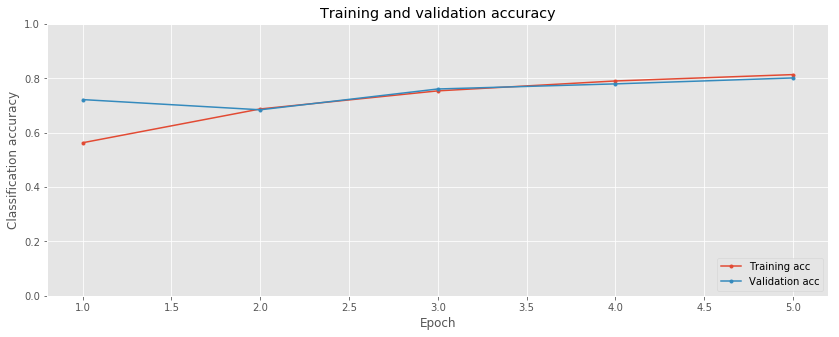

In [78]:
# Plot the training and validation accuracy

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

history_dict = history.history

acc      = history_dict['accuracy']
val_acc  = history_dict['val_accuracy']
loss     = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(14,5))
plt.plot(epochs, acc, marker='.', label='Training acc')
plt.plot(epochs, val_acc, marker='.', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend(loc='lower right')
plt.ylim(0, 1);

#### The TensorFlow embedding projector

The Tensorflow embedding projector can be found [here](https://projector.tensorflow.org/).

In [85]:
# Retrieve the embedding layer's weights from the trained model
#To use the projector let's save the weights of the embedding layer
weights=model.layers[1].get_weights()[0]

In [86]:
# Save the word Embeddings to tsv files
# Two files: 
#     one contains the embedding labels (meta.tsv),
#     one contains the embeddings (vecs.tsv)

import io
from os import path

out_v = io.open(path.join('', 'vecs.tsv'), 'w', encoding='utf-8')
out_m = io.open(path.join('', 'meta.tsv'), 'w', encoding='utf-8')

k = 0

for word, token in imdb_word_index.items():
    if k != 0:
        out_m.write('\n')
        out_v.write('\n')
    
    out_v.write('\t'.join([str(x) for x in weights[token]]))
    out_m.write(word)
    k += 1
    
out_v.close()
out_m.close()
# beware large collections of embeddings!

---
<a id="coding_tutorial_5"></a>
## Recurrent neural network layers

In [ ]:
#the advantage with this layer is that it does not need embedding, it does not need the input_length parameter
#because it can receive sequences of different lengths
from tensorflow.keras.layers import SimpleRNN
Embedding(input_dim=100,output_dim=32)
simple_layer=SimpleRNN(units=16)

#### Initialize and pass an input to a SimpleRNN layer

In [87]:
# Create a SimpleRNN layer and test it
from tensorflow.keras.layers import SimpleRNN
simple_layer=SimpleRNN(units=16)


In [88]:
# Note that only the final cell output is returned
sequence=tf.constant([[[1.,1.],[2.,2.],[56.,-100.]]])
layer_oput=simple_layer(sequence)
layer_oput

<tf.Tensor: id=13314, shape=(1, 16), dtype=float32, numpy=
array([[-1.        ,  1.        ,  1.        , -1.        ,  0.99964213,
         1.        , -1.        ,  1.        ,  1.        ,  1.        ,
         0.99999976, -1.        , -1.        ,  1.        , -1.        ,
         1.        ]], dtype=float32)>

#### Load and transform the IMDB review sentiment dataset

In [89]:
# A function to load and preprocess the IMDB dataset

def get_and_pad_imdb_dataset(num_words=10000, maxlen=None, index_from=2):
    from tensorflow.keras.datasets import imdb

    # Load the reviews
    (x_train, y_train), (x_test, y_test) = imdb.load_data(path='imdb.npz',
                                                          num_words=num_words,
                                                          skip_top=0,
                                                          maxlen=maxlen,
                                                          start_char=1,
                                                          oov_char=2,
                                                          index_from=index_from)

    x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        maxlen=None,
                                                        padding='pre',
                                                        truncating='pre',
                                                        value=0)
    
    x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                           maxlen=None,
                                                           padding='pre',
                                                           truncating='pre',
                                                           value=0)
    return (x_train, y_train), (x_test, y_test)

In [90]:
# Load the dataset

(x_train, y_train), (x_test, y_test)=get_and_pad_imdb_dataset( maxlen=250)

In [91]:
# A function to get the dataset word index

def get_imdb_word_index(num_words=10000, index_from=2):
    imdb_word_index = tf.keras.datasets.imdb.get_word_index(
                                        path='imdb_word_index.json')
    imdb_word_index = {key: value + index_from for
                       key, value in imdb_word_index.items() if value <= num_words-index_from}
    return imdb_word_index

In [92]:
# Get the word index using get_imdb_word_index()

imdb_word_index=get_imdb_word_index()

#### Create a recurrent neural network model

In [93]:
# Get the maximum index value
max_index_value=max(imdb_word_index.values())
embedding_dim=16

In [94]:
# Using Sequential, build the model:
# 1. Embedding.
# 2. LSTM.
# 3. Dense.
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding,LSTM,Dense

model=Sequential([
    Embedding(input_dim=max_index_value+1,output_dim=embedding_dim,mask_zero=True),
    LSTM(units=16),
    Dense(units=1,activation='sigmoid')
])


#### Compile and fit the model

In [97]:
# Compile the model with binary cross-entropy loss
model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam')

In [98]:
# Fit the model and save its training history
history=model.fit(x_train,y_train,epochs=3,batch_size=32)

Train on 25000 samples
Epoch 1/3
 6240/25000 [======>.......................] - ETA: 9:47 - loss: 0.6255 - accuracy: 0.6535

KeyboardInterrupt: 

#### Plot learning curves

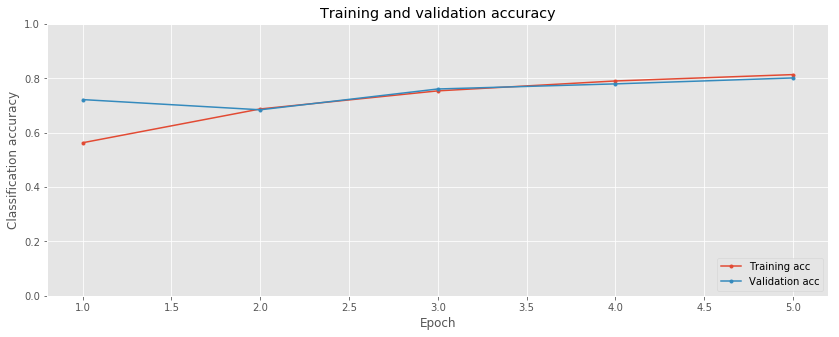

In [99]:
# Plot the training and validation accuracy

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

history_dict = history.history

acc      = history_dict['accuracy']
val_acc  = history_dict['val_accuracy']
loss     = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(14,5))
plt.plot(epochs, acc, marker='.', label='Training acc')
plt.plot(epochs, val_acc, marker='.', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend(loc='lower right')
plt.ylim(0, 1);

#### Make predictions with the model

In [100]:
# View the first test data example sentence
# (invert the word index)
inv_imdb_word_index={value:key for key,value in imdb_word_index.items()}
[inv_imdb_word_index[index] for index in x_test[0] if index>2]

['ignore',
 'the',
 'bad',
 'reviews',
 'on',
 'here',
 'this',
 'film',
 'is',
 'awesome',
 'just',
 'before',
 'dawn',
 'is',
 'a',
 'great',
 'example',
 'of',
 'what',
 'can',
 'be',
 'done',
 'in',
 'a',
 'film',
 'with',
 'a',
 'minimal',
 'budget',
 'if',
 'you',
 'have',
 'a',
 'dedicated',
 'crew',
 'decent',
 'script',
 'and',
 'a',
 'cool',
 'idea',
 'for',
 'a',
 'film',
 "it's",
 'a',
 'hell',
 'of',
 'a',
 'lot',
 'of',
 'fun',
 'br',
 'br',
 'i',
 'enjoyed',
 'it',
 'a',
 'lot',
 'more',
 'than',
 'most',
 'other',
 "80's",
 'slashers',
 'because',
 'the',
 'killer',
 'is',
 'so',
 'unique',
 'wrong',
 'turn',
 'ripped',
 'this',
 'movie',
 'off',
 'something',
 'fierce',
 "there's",
 'plenty',
 'of',
 'blood',
 'and',
 'scares',
 'my',
 'girlfriend',
 'was',
 'freaked',
 'out',
 'and',
 'she',
 'watches',
 'almost',
 'everything',
 'with',
 'me',
 'and',
 "doesn't",
 "it's",
 'got',
 'that',
 'creepiness',
 'to',
 'it',
 'br',
 'br',
 "i'd",
 'say',
 'that',
 'just',
 '

In [101]:
# Get the model prediction using model.predict()

model.predict(x_test[None,0,:])


array([[0.55473804]], dtype=float32)

In [102]:
# Get the corresponding label
y_test[0]

1

---
<a id="coding_tutorial_6"></a>
## Stacked RNNs and the Bidirectional wrapper

In [ ]:
#having return_sequences=False returns output only at the end of the time step
LSTM(units=32,return_sequences=False)
#return_sequences=False returns the output at each time step
LSTM(units=32,return_sequences=True)

#so we can use stacked LSTMs
LSTM(units=32,return_sequences=True),
LSTM(units=64,return_sequences=False)

#bidirectional is used to have both context of the past and the present
#providing forward and backward network functionality
#merge_mode dictates how to merge the backward and forward outputs
Bidirectional(LSTM(units=8),merge_mode='sum',backward_layer=GRU(units=8,go_backwards=True))

#### Load and transform the IMDB review sentiment dataset

In [103]:
# A function to load and preprocess the IMDB dataset

def get_and_pad_imdb_dataset(num_words=10000, maxlen=None, index_from=2):
    from tensorflow.keras.datasets import imdb

    # Load the reviews
    (x_train, y_train), (x_test, y_test) = imdb.load_data(path='imdb.npz',
                                                          num_words=num_words,
                                                          skip_top=0,
                                                          maxlen=maxlen,
                                                          start_char=1,
                                                          oov_char=2,
                                                          index_from=index_from)

    x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        maxlen=None,
                                                        padding='pre',
                                                        truncating='pre',
                                                        value=0)
    
    x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                           maxlen=None,
                                                           padding='pre',
                                                           truncating='pre',
                                                           value=0)
    return (x_train, y_train), (x_test, y_test)

In [105]:
# Load the dataset
(x_train, y_train), (x_test, y_test)=get_and_pad_imdb_dataset(num_words=5000, maxlen=250)


In [104]:
# A function to get the dataset word index

def get_imdb_word_index(num_words=10000, index_from=2):
    imdb_word_index = tf.keras.datasets.imdb.get_word_index(
                                        path='imdb_word_index.json')
    imdb_word_index = {key: value + index_from for
                       key, value in imdb_word_index.items() if value <= num_words-index_from}
    return imdb_word_index

In [106]:
# Get the word index using get_imdb_word_index()

imdb_word_index=get_imdb_word_index(num_words=5000)

#### Build stacked and bidirectional recurrent models

In [107]:
# Get the maximum index value and specify an embedding dimension

max_index_value=max(imdb_word_index.values())
embedding_dim=16

In [108]:
# Using Sequential, build a stacked LSTM model via return_sequences=True
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding,LSTM,Dense

model=Sequential([
    Embedding(input_dim=max_index_value+1,output_dim=embedding_dim,mask_zero=True),
    LSTM(units=32,return_sequences=True),
    LSTM(units=32,return_sequences=False),
    Dense(units=1,activation='sigmoid')
])


In [112]:
# Using Sequential, build a bidirectional RNN with merge_mode='sum'
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding,LSTM,Dense,Bidirectional,GRU

model=Sequential([
    Embedding(input_dim=max_index_value+1,output_dim=embedding_dim,mask_zero=True),
    Bidirectional(LSTM(units=8),merge_mode='sum',backward_layer=GRU(units=8,go_backwards=True)),
    Dense(units=1,activation='sigmoid')
])

In [113]:
# Create a model featuring both stacked recurrent layers and a bidirectional layer
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding,LSTM,Dense,Bidirectional,GRU

model=Sequential([
    Embedding(input_dim=max_index_value+1,output_dim=embedding_dim,mask_zero=True),
    Bidirectional(LSTM(units=8,return_sequences=True),merge_mode='concat'),
    GRU(units=8,return_sequences=False),
    Dense(units=1,activation='sigmoid')
])

#### Compile and fit the model

In [114]:
# Compile the model
model.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam')

In [115]:
# Train the model, saving its history
history=model.fit(x_train,y_train,epochs=1,batch_size=32)

Train on 25000 samples
15424/25000 [=================>............] - ETA: 14:28 - loss: 0.4678 - accuracy: 0.7618

KeyboardInterrupt: 

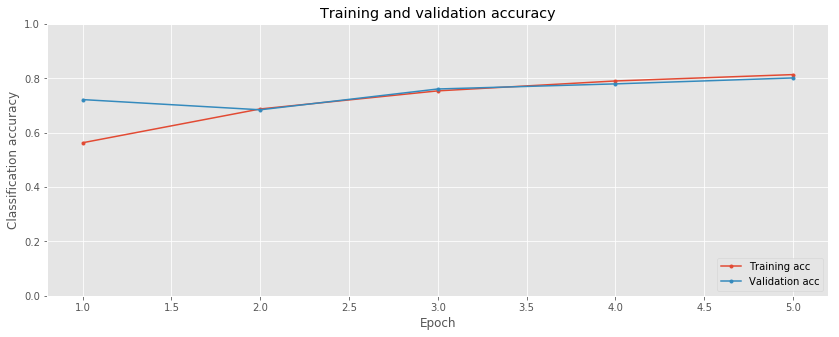

In [116]:
# Plot the training and validation accuracy

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

history_dict = history.history

acc      = history_dict['accuracy']
val_acc  = history_dict['val_accuracy']
loss     = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(14,5))
plt.plot(epochs, acc, marker='.', label='Training acc')
plt.plot(epochs, val_acc, marker='.', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend(loc='lower right')
plt.ylim(0, 1);